In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Sydney_Data.csv')

In [3]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

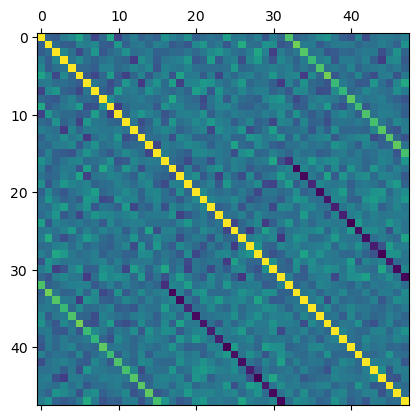

In [4]:
plt.matshow(X.corr())

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.75)

In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [7]:
model.fit(X_train, y_train)
pd.DataFrame(model.coef_, X.columns, columns=['Coef'])

,Coef
127.9439,-0.001247
264.9656,-0.005712
68.3481,-0.001594
521.757,-0.001058
443.6997,-0.005412
195.9648,0.000189
166.7701,-0.004754
504.285,-0.000059
104.0226,-0.003630
205.2257,-0.005234


In [8]:
predictions = model.predict(X_test)
model.score(X_test, y_test)

0.9999989493945355

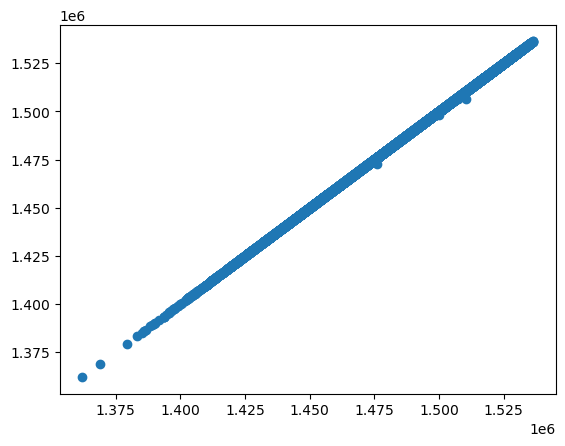

In [9]:
plt.scatter(y_test, predictions)

(array([5.3996e+04, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ -13.77511198,  407.03115045,  827.83741287, 1248.64367529,
        1669.44993772, 2090.25620014, 2511.06246256, 2931.86872499,
        3352.67498741, 3773.48124984, 4194.28751226]),
 <BarContainer object of 10 artists>)

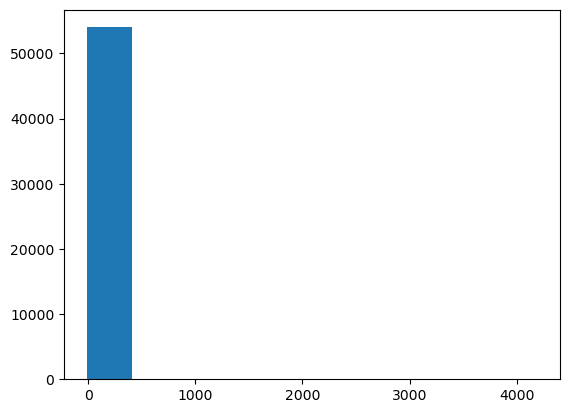

In [10]:
plt.hist(y_test - predictions)

In [11]:
from sklearn import metrics

metrics.mean_absolute_error(y_test, predictions)

2.1311698591174357

In [12]:
metrics.mean_squared_error(y_test, predictions)

561.4399179096265

In [13]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

23.69472341914179